In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import csv
import random
import operator
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [101]:
df = pd.read_csv('admission_data.csv')

X = df[df.columns[[1,2,3,4,5,6,7]]].values
y = df[df.columns[8]].values

for i in range(len(y)):
    if y[i]<0.5 :
        y[i]=0.0
    else:
        y[i]=1.0
y = np.expand_dims(y, -1)
y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [102]:
def train_test_split(X, Y, split=0.2):
    indices = np.random.permutation(X.shape[0])
    split = int(split * X.shape[0])

    train_indices = indices[split:]
    test_indices = indices[:split]

    x_train, x_test = X[train_indices], X[test_indices]
    y_train, y_test = Y[train_indices], Y[test_indices]

    return x_train, y_train, x_test, y_test

x_train, y_train, x_valid, y_valid = train_test_split(X, y)

print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)


(360, 7) (90, 7) (360, 1) (90, 1)


In [103]:
class LogisticRegression:
    def __init__(self, alpha=0.04, iterations=500):
        self.alpha=alpha
        self.iterations = iterations
        
        
    def initialize_vector(self, X):
        self.theta_vector = np.random.rand(X.shape[1], 1)
        self.constant = np.zeros((1,))
    
        
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def multiply_vector_matrix(self, X):
        return np.dot(X, self.theta_vector) + self.constant

    def scale_features(self,X):
        X=(X - self.feature_mean) / self.std_dev
        return X
    
    def cost_function(self, X, y):
        z=self.sigmoid(self.multiply_vector_matrix(X))
        return -np.mean((y * np.log(z + 1e-15))+((1 - y)*np.log((1-z)+1e-15)))
    
    def get_cost(self,z_train,y_train):
        return -np.mean((y * np.log(z_train + 1e-15))+((1 - y)*np.log((1-z_train)+1e-15)))
        
        
    def fit(self, X_train, Y_train):
        
        no_of_iterations=[]
        cost_train=[]
        
        self.initialize_vector(X_train)
        self.feature_mean = X_train.mean(axis=0).T
        self.std_dev = X_train.std(axis=0).T
        X_train = self.scale_features(X_train)

        for i in range(self.iterations):
            Z_train=self.sigmoid(self.multiply_vector_matrix(X_train))
            
            no_of_iterations.append(i)
            cost_train.append(self.cost_function(X_train,Y_train))
            
            sub = Z_train-Y_train
            dw=np.mean(sub*X_train,axis=0,keepdims=True).T
            db=np.mean(sub)
            self.theta_vector=self.theta_vector-self.alpha *dw
            self.constant=self.constant-self.alpha *db
            
        
        
        mlt.plot(cost_train)
        mlt.xlabel('Iterations (In 10s)')
        mlt.ylabel('Training cost')
        mlt.title('Learning rate'+str(self.alpha))
        mlt.show()
        return self
    
    def predict(self, X):
        X = self.scale_features(X)
        linear = self.multiply_vector_matrix(X)
        preds = self.sigmoid(linear)
        return (preds >= 0.5).astype('int')
    
    

    def get_accuracy(self,X,y):
        y_pred=self.predict(X)
        return np.mean(y_pred==y)

    
         

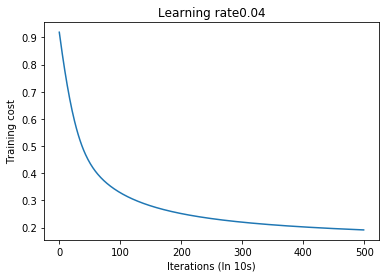

[[ 0.2607282 ]
 [ 0.35417361]
 [ 0.0766024 ]
 [-0.02785038]
 [ 0.23655532]
 [ 0.5220481 ]
 [-0.01718675]]


In [106]:
model = LogisticRegression()
ans=model.fit(x_train, y_train)
print(ans.theta_vector)

In [105]:
print('Accuracy on test set:',model.get_accuracy(x_valid, y_valid) * 100)
print('Loss on test set:',model.cost_function(x_valid, y_valid))

Accuracy on test set: 93.33333333333333
Loss on test set: 2.302585092994045
